In [4]:
import pandas as pd
import altair as alt

alt.data_transformers.disable_max_rows()

data = pd.read_csv('./data/top5.csv', parse_dates=['date',]).fillna(0)

In [5]:
len(data)

6840

In [6]:
data.tail(10)

,date,boro,metric,value
6830,2019-06-14,QUEENS,Noise - Street/Sidewalk,54
6831,2019-06-14,STATEN ISLAND,complaints,15
6832,2019-06-14,STATEN ISLAND,Noise - Commercial,15
6833,2019-06-14,STATEN ISLAND,Noise - Residential,15
6834,2019-06-14,STATEN ISLAND,Request Large Bulky Item Collection,15
6835,2019-06-14,STATEN ISLAND,Blocked Driveway,15
6836,2019-06-14,STATEN ISLAND,Street Condition,15
6837,2019-06-14,Unspecified,complaints,5
6838,2019-06-14,Unspecified,Highway Condition,5
6839,2019-06-14,Unspecified,Benefit Card Replacement,5


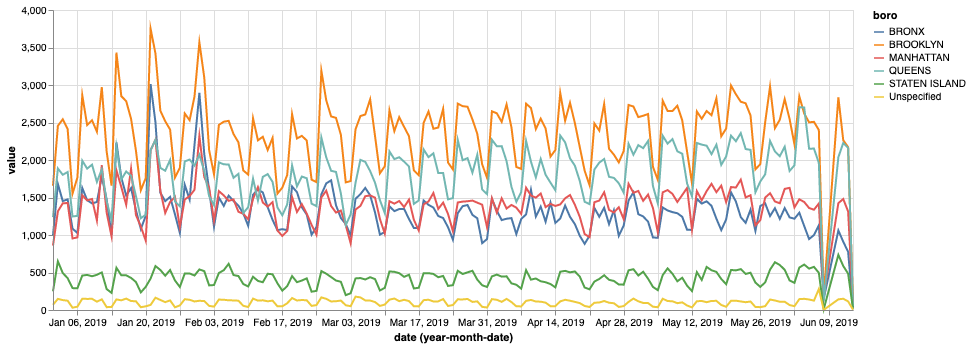

In [7]:
timeline = alt.Chart(data, width=800).mark_line().encode(
    x=alt.X('date:T', timeUnit='yearmonthdate'),
    y='value',
    color='boro'
).transform_filter(
    (alt.datum.metric == 'complaints')
)

timeline

In [8]:
barchart = alt.Chart(data, width=800).mark_bar().encode(
    x=alt.X('svalue:Q', title='Complaints Total'),
    y=alt.Y(
        'metric:N',
        sort=alt.EncodingSortField(
            field="svalue", # The field to use for the sort
            order="descending" # The order to sort in
        )
        
    ),
    color=alt.value('purple'),
    tooltip=['metric', 'svalue:Q']
).transform_filter(
    "datum.metric != 'complaints'"
).transform_filter("datum.boro == 'NYC'").transform_aggregate(
    svalue='sum(value)',
    groupby=["metric" ]
).transform_window(
    rank='rank(svalue)',
    sort=[alt.SortField('svalue', order='descending')]).transform_filter('datum.rank <= 10')


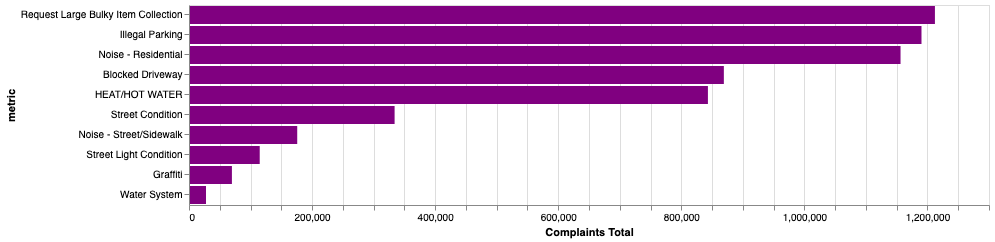

In [9]:
barchart

In [10]:
brush = alt.selection_interval(encodings=['x'], empty='all')

T = timeline.add_selection(
    brush
)

B = barchart.transform_filter(
    brush
)



In [11]:
B.transform = [B.transform[-1],] + B.transform[:-1]

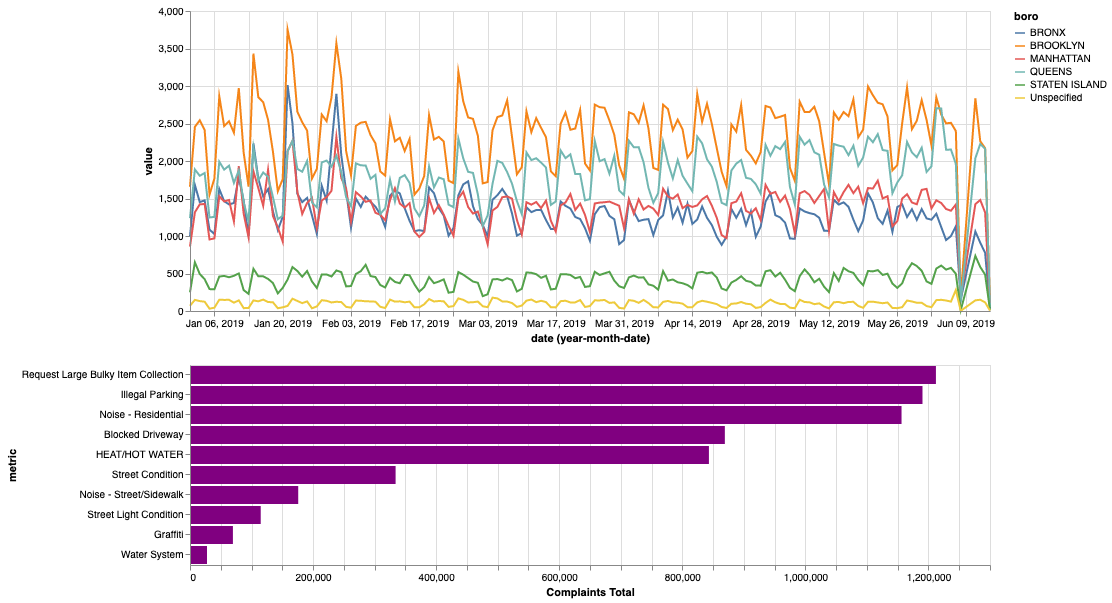

In [17]:
dash = alt.vconcat(
    T, 
    B,
    data=data
)

dash

In [26]:
dash.save('dashboard.html')